<a href="https://colab.research.google.com/github/soojinjin/hospital_distribution_data_project/blob/main/%EC%9E%84%EC%88%98%EC%A7%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 충남지역 종합병원 분포 확인

www.data.go.kr

In [ ]:
# 필요 라이브러리 불러오기
import pandas as pd
import numpy as np

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.rc("font", family = 'AppleGothic') # 맥북
# plt.rc("font". family = 'Malgun Gothic') # 윈도우

plt.rc("axes", unicode_minus = False) # 한글 폰트를 사용하게 되면 '-'가 깨지는 경우 대비

In [ ]:
df = pd.read_csv('소상공인시장진흥공단_상가업소정보_의료기관_201909.csv', low_memory=False)

print(df.shape)
df.head()

(91335, 39)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528


In [ ]:
df.info() # data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

In [ ]:
# 결측치
df.isnull().sum()

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

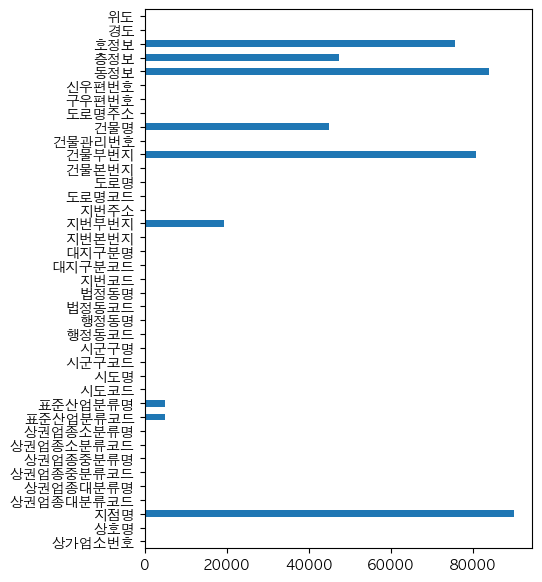

In [ ]:
# 결측치에 대한 시각화 수행
null_count = df.isnull().sum()
null_count.plot.barh(figsize = (5,7))
plt.show()

In [ ]:
df_null_count = null_count.reset_index()

In [ ]:
df_null_count.columns = ['컬럼명','결측치 수']

In [ ]:
df_null_count_top = df_null_count.sort_values(by = '결측치 수', ascending = False).head(10)

In [ ]:
df_null_count_top

,컬럼명,결측치 수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


In [ ]:
# 결측치 데이터프레임 생성 (상위 10개 결측치)
df_null_count = null_count.reset_index()
df_null_count.columns = ['컬럼명','결측치 수']
df_null_count_top = df_null_count.sort_values(by = '결측치 수', ascending = False).head(10)
df_null_count_top

,컬럼명,결측치 수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


In [ ]:
# 특정 컬럼명에 대한 결측치 삭제(상위 10개 결측치 제거)
drop_columns = df_null_count_top['컬럼명'].tolist()
print(df.shape) # 결측치 제거 전 데이터 형태
df = df.drop(drop_columns, axis = 1) # 컬럼을 기준(axis = 1), 행을 기준(axis = 0)
print(df.shape) # 결측치 제거 후 데이터 형태

(91335, 39)
(91335, 29)


In [ ]:
df.describe(include = 'object') # 문자열 데이터들에 대한 요약통계량

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335,91335
unique,56910,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54142,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,1123010300109650001031604,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198,198


In [ ]:
city = df['시도명'].value_counts()

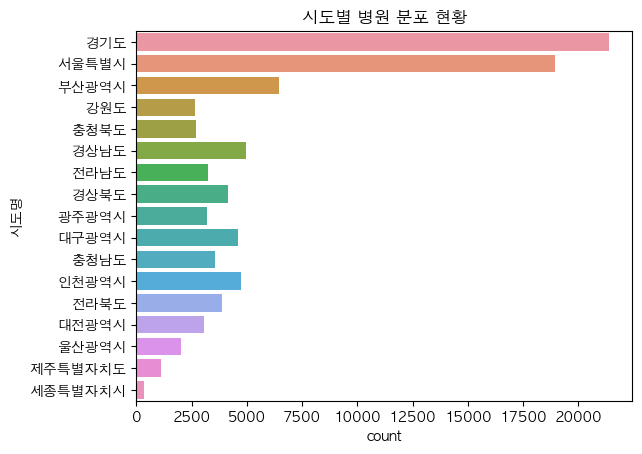

In [ ]:
sns.countplot(data = df, y = '시도명')
plt.title("시도별 병원 분포 현황")
plt.show()

In [ ]:
# 색인하기 (시도명이 "경기도"이고 상권업종소분류명 "산부인과")
test01 = df[(df['시도명'] == '경기도') & (df['상권업종소분류명'] == '산부인과')]
test01.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
0,19956873,하나산부인과,S,의료,S01,병원,S01B10,산부인과,경기도,41273.0,...,경기도 안산시 단원구 선부동 1081,412733191011,경기도 안산시 단원구 달미로,10,4127310900110810000010857,경기도 안산시 단원구 달미로 10,425764.0,15236.0,126.814295,37.336344
38,20992885,오혜숙산부인과,S,의료,S01,병원,S01B10,산부인과,경기도,41150.0,...,경기도 의정부시 의정부동 172-22,411503181060,경기도 의정부시 시민로,141,4115010100101720022000610,경기도 의정부시 시민로 141,480010.0,11695.0,127.050726,37.737886
572,20989868,송계승산부인과,S,의료,S01,병원,S01B10,산부인과,경기도,41133.0,...,경기도 성남시 중원구 금광동 3662,411333179004,경기도 성남시 중원구 광명로,339,4113310300136620000041528,경기도 성남시 중원구 광명로 339,462240.0,13177.0,127.163475,37.445998
771,21084742,구리장중환산부인과,S,의료,S01,병원,S01B10,산부인과,경기도,41310.0,...,경기도 구리시 수택동 853,413103196010,경기도 구리시 이문안로,106,4131010500108530000007471,경기도 구리시 이문안로 106,471700.0,11940.0,127.142802,37.591543
816,21204200,일산제일병원,S,의료,S01,병원,S01B10,산부인과,경기도,41285.0,...,경기도 고양시 일산동구 장항동 896-2,412853192094,경기도 고양시 일산동구 중앙로,1161,4128510400108960002002811,경기도 고양시 일산동구 중앙로 1161,410380.0,10414.0,126.778108,37.650519


In [ ]:
# [] 대괄호: 리스트, 데이터프레임에서 색인
# {} 중괄호: 딕셔너리, 셋
# () 소괄호: 함수를 불러올 때, 연산에 우선순위를 설정할 때, 튜플

In [ ]:
test02 = df[(df['시도명'] == '충청남도') & (df['상권업종소분류명'] == '약국')]
test02.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
53,21654232,천일약국,S,의료,S02,약국/한약방,S02A01,약국,충청남도,44250.0,...,충청남도 계룡시 신도안면 남선리 1057,442504568042,충청남도 계룡시 신도안면 신도안1길,49,4425033021110570000004048,충청남도 계룡시 신도안면 신도안1길 49,321924.0,32801.0,127.245636,36.296172
120,21579409,하나약국,S,의료,S02,약국/한약방,S02A01,약국,충청남도,44270.0,...,충청남도 당진시 읍내동 168-11,442704595066,충청남도 당진시 교동길,99,4483025021101680011086276,충청남도 당진시 교동길 99,343920.0,31776.0,126.632281,36.891167
153,22312807,구세약방,S,의료,S02,약국/한약방,S02A01,약국,충청남도,44150.0,...,충청남도 공주시 의당면 청룡리 663-3,441503251034,충청남도 공주시 의당면 의당로,327,4415036026106630003020134,충청남도 공주시 의당면 의당로 327,314813.0,32517.0,127.139825,36.499432
275,22350656,중앙약국,S,의료,S02,약국/한약방,S02A01,약국,충청남도,44180.0,...,충청남도 보령시 대천동 197-1,441803252047,충청남도 보령시 대흥로,28,4418010100101970001014980,충청남도 보령시 대흥로 28,355010.0,33464.0,126.595624,36.349187
1053,21557287,비타민약국,S,의료,S02,약국/한약방,S02A01,약국,충청남도,44200.0,...,충청남도 아산시 권곡동 544-2,442004559763,충청남도 아산시 충무로72번길,6,4420011400105440002031951,충청남도 아산시 충무로72번길 6,336030.0,31515.0,127.006676,36.787208


In [ ]:
# 구별로는 몇개가 존재하는지 확인해보자.
test02['시군구명'].value_counts(normalize = True)

천안시 서북구    0.155422
아산시        0.149398
천안시 동남구    0.130120
서산시        0.069880
당진시        0.067470
논산시        0.060241
공주시        0.055422
예산군        0.055422
보령시        0.054217
홍성군        0.039759
부여군        0.038554
태안군        0.034940
서천군        0.028916
금산군        0.027711
청양군        0.019277
계룡시        0.013253
Name: 시군구명, dtype: float64

In [ ]:
df_ch_hospital = df[(df['상권업종소분류명'] == '종합병원') & (df['시도명'] == '충청남도')]
print(df_ch_hospital.shape)
df_ch_hospital.head()

(23, 29)


,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
1188,21725662,도고성모병원,S,의료,S01,병원,S01B01,종합병원,충청남도,44200.0,...,충청남도 아산시 도고면 신언리 94-36,442003253053,충청남도 아산시 도고면 아산만로,177,4420040021100940036015880,충청남도 아산시 도고면 아산만로 177,336914.0,31550.0,126.867846,36.759267
5697,23777465,바울의료재단,S,의료,S01,병원,S01B01,종합병원,충청남도,44200.0,...,충청남도 아산시 모종동 568-7,442004559219,충청남도 아산시 번영로230번길,13,4420011300105680007049293,충청남도 아산시 번영로230번길 13,336802.0,31526.0,127.016457,36.782865
6297,25480543,순천향의생명연구원,S,의료,S01,병원,S01B01,종합병원,충청남도,44131.0,...,충청남도 천안시 동남구 봉명동 39-1,441313250053,충청남도 천안시 동남구 봉정로,25,4413111300100390001020688,충청남도 천안시 동남구 봉정로 25,330930.0,31151.0,127.139128,36.804308
6644,25555927,지방공사공주의료원,S,의료,S01,병원,S01B01,종합병원,충청남도,44150.0,...,충청남도 공주시 중동 330-1,441503251030,충청남도 공주시 웅진로,130,4415010400103300001753533,충청남도 공주시 웅진로 130,314050.0,32563.0,127.124855,36.451910
10170,24657805,건강성모의원,S,의료,S01,병원,S01B01,종합병원,충청남도,44800.0,...,충청남도 홍성군 홍성읍 오관리 301-5,448004586424,충청남도 홍성군 홍성읍 조양로144번길,7,4480025021103010005038900,충청남도 홍성군 홍성읍 조양로144번길 7,350815.0,32230.0,126.665938,36.601339


In [ ]:
df_ch_hospital['시군구명'].value_counts()

천안시 동남구    9
아산시        3
공주시        2
홍성군        2
당진시        2
서산시        1
서천군        1
보령시        1
천안시 서북구    1
부여군        1
Name: 시군구명, dtype: int64

In [ ]:
df_ch_hospital.loc[~df_ch_hospital['상호명'].str.contains('종합병원'), '상호명']

1188                 도고성모병원
5697                 바울의료재단
6297              순천향의생명연구원
6644              지방공사공주의료원
10170                건강성모의원
11261         지방공사충청남도서산의료원
16718                 순천향의원
19124                재원의료재단
20152         지방공사공주의료원장례식장
22698               순천향천안병원
25794          순천향대학교부속천안병원
27990                보령제일병원
31448                성환연합의원
32904          동은의료재단순천향대학교
34591               의정부성모병원
50984                임천현대의원
51693               카톨릭성모의원
59182    대전교구천주교회유지재단당진성모병원
75070                 잇츠미의원
75535                 송탁호의원
76483                건강백세의원
76684                  하나의원
Name: 상호명, dtype: object

In [ ]:
# 연구원, 장례식장, 재단과 같은 단어가 있는 경우 종합병원이 아니다.
drop_row = df_ch_hospital[df_ch_hospital['상호명'].str.contains("연구원|장례식장|재단")].index
drop_row = drop_row.tolist()
drop_row

[5697, 6297, 19124, 20152, 32904, 59182]

In [ ]:
print(df_ch_hospital.shape)
df_ch_hospital = df_ch_hospital.drop(drop_row, axis = 0) # axis = 1 (열을 기준으로) / axis = 0 (행을 기준으로)
print(df_ch_hospital.shape)

(23, 29)
(17, 29)


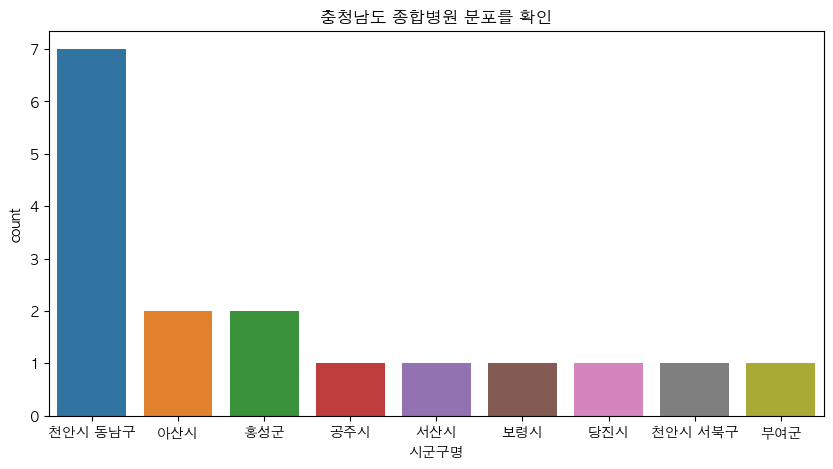

In [ ]:
# 시군구명에 따라 종합병원의 숫자를 countplot으로 그려봅시다.
plt.figure(figsize = (10,5))
sns.countplot(data = df_ch_hospital, x = '시군구명', order = df_ch_hospital['시군구명'].value_counts().index)
plt.title("충청남도 종합병원 분포를 확인")
plt.show()

In [ ]:
df['상권업종소분류명'].value_counts()

약국         18964
치과의원       13731
한의원        13211
내과/외과      11374
기타병원        4922
일반병원        3385
동물병원        3098
정형/성형외과     2562
소아과         2472
수의업-종합      2216
치과기공소       1724
이비인후과의원     1486
한약방         1442
피부과         1273
산부인과        1116
노인/치매병원     1055
안과의원        1042
비뇨기과         809
종합병원         762
치과병원         756
언어치료         664
유사의료업기타      629
탕제원          517
산후조리원        511
신경외과         421
한방병원         397
척추교정치료       338
침구원          154
혈액원          130
응급구조대        125
조산원           30
접골원            9
수의업-기타         9
제대혈            1
Name: 상권업종소분류명, dtype: int64